In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Ambulance_Responses_by_Month_data = pd.read_csv('https://data.austintexas.gov/api/views/bptg-ndvw/rows.csv?accessType=DOWNLOAD')
# this data covers the EMS system response from Austin TX

#for col in Ambulance_Responses_by_Month_data.columns:
    #print(col)


In [3]:
Ambulance_Responses_by_Month = pd.DataFrame(Ambulance_Responses_by_Month_data)
Ambulance_Responses_by_Month = Ambulance_Responses_by_Month_data[['Month Key', 'Total System Responses']].copy()

Ambulance_Responses_by_Month["Year"] = Ambulance_Responses_by_Month["Month Key"].astype(str).str[:4]
Ambulance_Responses_by_Month["Month"] = Ambulance_Responses_by_Month["Month Key"].astype(str).str[4:]

Ambulance_Responses_by_Month = Ambulance_Responses_by_Month.drop(['Month Key'], axis = 1)

#print(Ambulance_Responses_by_Month.head())

In [4]:
#print("Average system response per month by year")

#Ambulance_Responses_by_Month.groupby('Year')['Total System Responses'].mean()

#print("Total system response per year")

#Ambulance_Responses_by_Month.groupby('Year')['Total System Responses'].sum()

In [5]:
data = pd.read_csv('https://data.austintexas.gov/api/views/gjtj-jt2d/rows.csv?accessType=DOWNLOAD')

#for col in data.columns:
    #print(col)
    
#print(data.head())

In [6]:
Incidents_by_Month = pd.DataFrame(data)

Incidents_by_Month["Year"] = Incidents_by_Month["Month Key"].astype(str).str[:4]
Incidents_by_Month["Month"] = Incidents_by_Month["Month Key"].astype(str).str[4:]

In [7]:
Priority_by_Year = pd.DataFrame(data)

Priority_by_Year = Incidents_by_Month.groupby('Year')[['Austin P1 Incidents', 'Travis County P1 Incidents', 'Austin P2 Incidents', 'Travis County P2 Incidents', 'Austin P3 Incidents', 'Travis County P3 Incidents', 'Austin P4 Incidents', 'Travis County P4 Incidents', 'Austin P5 Incidents', 'Travis County P5 Incidents']].sum()
Priority_by_Year["Total Incidents"] = Incidents_by_Month.groupby('Year')['Combined Austin and Travis County Incidents'].sum()

for priority_num in range(1,6):
    sum_column = Priority_by_Year['Austin P'+str(priority_num)+' Incidents'] + Priority_by_Year['Travis County P'+str(priority_num)+' Incidents']
    Priority_by_Year['Total P'+str(priority_num)+' Incidents'] = sum_column
    Priority_by_Year['Percent P'+str(priority_num)] = (Priority_by_Year['Total P'+str(priority_num)+' Incidents'] / Priority_by_Year['Total Incidents']) *100
    Priority_by_Year['Average P'+str(priority_num)+' Incidents'] = Priority_by_Year['Total P'+str(priority_num)+' Incidents'].mean()
    Priority_by_Year['Average P'+str(priority_num)+' Percentage'] = Priority_by_Year['Percent P'+str(priority_num)].mean()
    Priority_by_Year = Priority_by_Year.drop(['Austin P'+str(priority_num)+' Incidents', 'Travis County P'+str(priority_num)+' Incidents'], axis = 1)

print(Priority_by_Year)


      Total Incidents  Total P1 Incidents  Percent P1  Average P1 Incidents  \
Year                                                                          
2010            24836                1653    6.655661           8488.166667   
2011           105357                7121    6.758924           8488.166667   
2012           113320                7895    6.966996           8488.166667   
2013           115533                8362    7.237759           8488.166667   
2014           121993                8372    6.862689           8488.166667   
2015           130875                9532    7.283286           8488.166667   
2016           131825               10332    7.837664           8488.166667   
2017           128863               10955    8.501277           8488.166667   
2018           122470                9825    8.022373           8488.166667   
2019           126480                9233    7.299968           8488.166667   
2020           119233                8495    7.12470

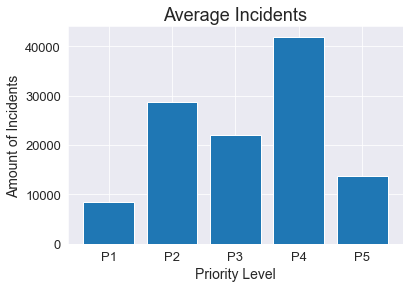

<Figure size 432x288 with 0 Axes>

In [13]:
Average_Incidents_data = [8488.166667, 28644.083333, 21982.0, 41958.833333 , 13685.75]
Average_Incidents_percentages = [7.328985, 25.300111, 18.63435, 36.727092, 12.009462]
Average_Incidents_labels = ['P1', 'P2', 'P3', 'P4', 'P5']

#sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks

plt.bar(Average_Incidents_labels,Average_Incidents_data)
plt.title('Average Incidents')
plt.xlabel('Priority Level')
plt.ylabel('Amount of Incidents')

#plt.rc('axes', titlesize=18)     # fontsize of the axes title
#plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
#plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
#plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
#plt.rc('legend', fontsize=13)    # legend fontsize
#plt.rc('font', size=13)          # controls default text sizes

plt.show()
plt.savefig('Average_Incidents_Bar_Graph.png')

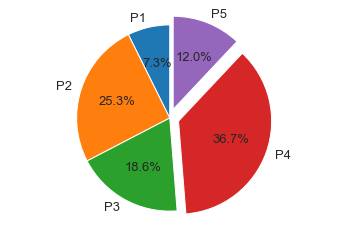

<Figure size 432x288 with 0 Axes>

In [11]:
labels = Average_Incidents_labels
sizes = Average_Incidents_percentages
explode = (0, 0, 0, 0.1, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, explode=explode, shadow=False)
ax1.axis('equal')

plt.show()
plt.savefig('Average_Incidents_Pie_Chart.png')